Database II, ADSD Jaar 1

# Fifa 2019 

Door: Jennifer Lee (S1133868)
Klas: AB
Datum: 05-04-2019

In dit document gaan ik de dataset van fifa2019 onderzoeken. 
Eerst gaan we de dataset importeren en verkennnen, zodat we hier onderzoeksvragen uit kunnen formuleren.

Alle eerste gaan we imports doen. Met o.a. Pandas, Matplotlib en Seaborn en plotly.

In [223]:
# Imports die nodig zijn om de code te runnen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

3.7.1


We gaan de inhoud van de csv bestand lezen met een comando uit panda. Deze commando leest de inhoud van de csv bestand in een variable die "df" heeft. "df" staat voor "DataFrame". DataFrame is een formaat binnen pandas om o.a. csv bestanden om te zetten naar een soort spreedsheet. Dataframes maken het gemakkelijk om met data te werken. 

In [224]:
# Wij gaan de alias pd van pandas gebruiken om functies te bereiken!
df = pd.read_csv("fifa19.csv")

Om de onderzoeksvragen te formuleren, wil ik eerst weten welke kolommen de dataset heeft. 

In [225]:
# om alle kolommen/rijen te laten zien gebruiken we de volgende code
pd.set_option('display.max_rows', 500) # i.p.v. 500 kun je None aangeven!
pd.set_option('display.max_columns', 500)

# Vervolgens i.p.v. df.columns aan te roepen, roep ik de volgende functie:
df.columns.tolist()

['Unnamed: 0',
 'ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiv

#### Onderzoeksvragen:

1. Heeft je potential, value en international reputation met elkaar te maken?
2. Analyseer de club Paris Saint-Germain

### Heeft je potential, value en international reputation met elkaar te maken?

Eerst gaan we een selectie doen op onze dataset en deze schoonmaken. We halen eerst uit onze dataset de kolommen die we voor deze deelvraag nodig hebben.

In [254]:
fifa = df[["Potential", "Value", "International Reputation"]]
print(iets.shape)

(18159, 3)


Onze dataset heeft nu 3 kolommen met Nationality, Value en International Reputation. Het heeft 18207 regels.
We gaan nu de data opschonen, door te kijken of er lege regels in de kolomen voor komen.

In [255]:
fifa.isnull().sum()

Potential                    0
Value                        0
International Reputation    48
dtype: int64

Aangezien Bij International Reputation er 48 lege velden zijn, gaan we deze uit ons dataset halen, zodat het de analyse niet beïnvloed.

In [256]:
fifa = fifa.dropna()

We gaan nu kijken of het deze velden succesvol heeft verwijderd.

In [257]:
fifa.isnull().sum()

Potential                   0
Value                       0
International Reputation    0
dtype: int64

Deze rijen zijn nu dus succesvol uit de dataset verwijderd.
Om berekeningen door te voeren moeten we zorgen dat de waardes die we gebruiken de juiste typen zijn.

In [258]:
fifa.dtypes

Potential                     int64
Value                        object
International Reputation    float64
dtype: object

Om met Value te kunnen rekenen moeten we deze dus transformeren.

In [259]:
x= fifa.Value.str.replace("€","")
fifa["Value"] = (x.replace(r'[KM]+$', '', regex=True).astype(float) * \
x.str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6])).astype(int)

Om te kijken of bovenstaande transformatie goed is gegaan printen we de dataset even uit. De eerste regel met nationality Argentina had een value van €110,5M

In [260]:
fifa.head()

,Potential,Value,International Reputation
0,94,110500000,5.0
1,94,77000000,5.0
2,93,118500000,5.0
3,93,72000000,4.0
4,92,102000000,4.0


Dit lijkt goed te zijn gegaan. We gaan kijken of de datatypes kloppen.

In [261]:
fifa.dtypes

Potential                     int64
Value                         int32
International Reputation    float64
dtype: object

Nu we dit hebben gedaan, lijkt het me interessant naar de top 5 met de hoogste potential, value en international reputation te bekijken.

In [262]:
#Top 5 hoogste potential bekijken
fifa.sort_values("Potential", ascending=False).head()

,Potential,Value,International Reputation
25,95,81000000,3.0
0,94,110500000,5.0
1,94,77000000,5.0
15,94,89000000,3.0
9,93,68000000,3.0


In [263]:
#Top 5 hoogste value bekijken
fifa.sort_values("Value", ascending=False).head()

,Potential,Value,International Reputation
2,93,118500000,5.0
0,94,110500000,5.0
4,92,102000000,4.0
5,91,93000000,4.0
15,94,89000000,3.0


In [264]:
#Top 5 hoogste International Reputation bekijken
fifa.sort_values("International Reputation", ascending=False).head()

,Potential,Value,International Reputation
0,94,110500000,5.0
2,93,118500000,5.0
109,85,14000000,5.0
1,94,77000000,5.0
7,91,80000000,5.0


Uit deze top 5 kan je nog niet zoveel zien. Echter is het wel al interessant.

We gaan nu een analyse maken met beschrijvende statistiek.

In [265]:
fifa.describe()

,Potential,Value,International Reputation
count,18159.000000,1.815900e+04,18159.000000
mean,71.319126,2.416131e+06,1.113222
std,6.134420,5.601319e+06,0.394031
min,48.000000,0.000000e+00,1.000000
25%,67.000000,3.000000e+05,1.000000
50%,71.000000,6.750000e+05,1.000000
75%,75.000000,2.000000e+06,1.000000
max,95.000000,1.185000e+08,5.000000


Hier is de betekenis:

* `count` Aantal niet null rijen.
* `mean` Gemiddelde van de waarden per kolom.
* `std` Is de standard deviation van standaard afwijking. Als die groot is, het betekent dat de waarden ver van elkaar liggen.
* `min` is de kleinste waarde.
* `25%` 25% van de spelers hebben een potential van onder de 67, een waarde van onder de 300K en een internation reputation van 1. 
* `50%` 50% van de spelers hebben een potential van onder de 71, een waarde van onder de 675K en een internation reputation van 1. 
* `75%` 75% van de spelers hebben een potential van onder de 75, een waarde van onder de 2M en een internation reputation van 1. 
* `max` de hoogste waarde per kolom.

We gaan nu met behulp van grafieken kijken of er verband is tussen deze kolommen.

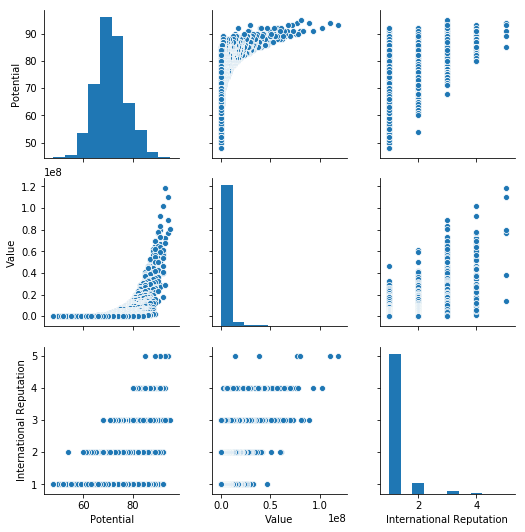

In [266]:
# Hieronder kun je zien of er een correlatie is tussen potential, value en internation reputation
sns.pairplot(fifa)

Zoals je in bovenstaande grafiek kan zien heeft internation reputation geen correlatie met value en potential. 
Echter hebben potential en value wel met elkaar te maken.

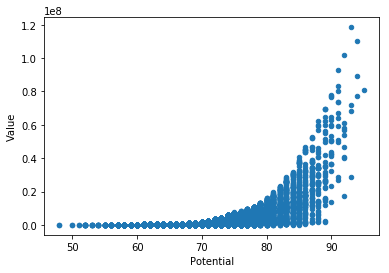

In [267]:
fifa.plot.scatter(x='Potential',y='Value');

Je value heeft dus te maken met je potential, echter heeft je internation reputation niets met je value of potential te maken. In de bovenstaande grafieken kan je dit duidelijk zien.

###  Analyseer de club Paris Saint-Germain.

Eerst gaan we een selectie doen op onze dataset en deze schoonmaken. We halen eerst uit onze dataset de kolommen die we voor deze deelvraag nodig hebben.

In [268]:
club = df[["Club", "Age", "Nationality", "Overall", "Potential", "Value", "Wage", "Preferred Foot"]]
print(club.shape)

(18207, 8)


Onze dataset heeft nu 8 kolommen met 18207 regels.
We gaan dit nu afbakenen naar de club Paris Saint-Germain.

In [269]:
clubParis = club[club["Club"] == "Paris Saint-Germain"]
print(clubParis.shape)

(30, 8)


Onze dataset heeft nu nog maar 8 kolommen en 30 regels.
We gaan nu de data opschonen, door te kijken of er lege regels in de kolomen voor komen.

In [270]:
clubParis.isnull().sum()

Club              0
Age               0
Nationality       0
Overall           0
Potential         0
Value             0
Wage              0
Preferred Foot    0
dtype: int64

Zoals je zien, zijn er geen lege velden. Om berekeningen door te voeren moeten we zorgen dat de waardes die we gebruiken de juiste typen zijn.

In [271]:
clubParis.dtypes

Club              object
Age                int64
Nationality       object
Overall            int64
Potential          int64
Value             object
Wage              object
Preferred Foot    object
dtype: object

Om met Value en Wage te kunnen rekenen moeten we deze dus transformeren.

In [272]:
# het omzetten van Value
a = clubParis.Value.str.replace("€","")
clubParis["Value"] = (a.replace(r'[KM]+$', '', regex=True).astype(float) * \
a.str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6])).astype(int)

# het omzetten van Wage
b = clubParis.Wage.str.replace("€", "")
c = b.str.replace("K", "")
clubParis["Wage"] = c.astype(int) * 1000

Om te kijken of bovenstaande transformatie goed is gegaan printen we een deel van de de dataset even uit. En kijken we nog een keer naar de datatypes. 

In [273]:
clubParis.head()

,Club,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot
2,Paris Saint-Germain,26,Brazil,92,93,118500000,290000,Right
21,Paris Saint-Germain,31,Uruguay,89,89,60000000,200000,Right
25,Paris Saint-Germain,19,France,88,95,81000000,100000,Right
39,Paris Saint-Germain,33,Brazil,88,88,24000000,165000,Right
41,Paris Saint-Germain,40,Italy,88,88,4000000,77000,Right


In [274]:
clubParis.dtypes

Club              object
Age                int64
Nationality       object
Overall            int64
Potential          int64
Value              int32
Wage               int32
Preferred Foot    object
dtype: object

Deze zijn juist verwerkt. 
We gaan nu een analyse maken met beschrijvende statistiek.

In [275]:
clubParis.describe()

,Age,Overall,Potential,Value,Wage
count,30.000000,30.000000,30.000000,3.000000e+01,30.000000
mean,24.566667,77.433333,83.566667,2.084417e+07,72033.333333
std,5.733647,9.023660,5.763639,2.718954e+07,64116.533633
min,17.000000,62.000000,66.000000,4.500000e+05,5000.000000
25%,19.250000,69.250000,80.000000,2.575000e+06,16750.000000
50%,24.500000,79.500000,84.000000,1.025000e+07,65000.000000
75%,26.750000,83.750000,87.750000,3.025000e+07,90750.000000
max,40.000000,92.000000,95.000000,1.185000e+08,290000.000000


Hier is de betekenis:

* `count` Aantal niet null rijen.
* `mean` Gemiddelde van de waarden per kolom.
* `std` Is de standard deviation van standaard afwijking. Als die groot is, het betekent dat de waarden ver van elkaar liggen.
* `min` is de kleinste waarde.
* `25%` 25% van de spelers hebben een age van onder de 19,25, een overall van onder de 69,25, een potential van onder de 80, een value van onder de 2,575 miljoen en een wage van onder de 16,750K. 
* `50%` 50% van de spelers hebben een age van onder de 24,5, een overall van onder de 79,5, een potential van onder de 84, een value van onder de 10,25 miljoen en een wage van onder de 650K. 
* `75%` 75% van de spelers hebben een age van onder de 26,75, een overall van onder de 83,75, een potential van onder de 87,75, een value van onder de 30,25 miljoen en een wage van onder de 90,75K. 
* `max` de hoogste waarde per kolom.

We gaan nu analyse doen met behulp van grafieken.

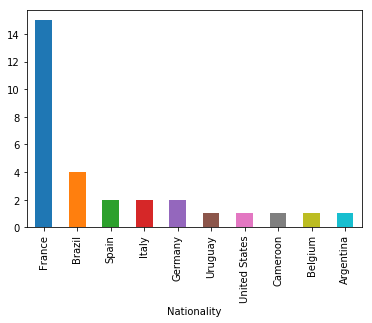

In [276]:
clubParis.groupby("Nationality").Nationality.count().sort_values(ascending=False).head(10).plot(kind="bar");

Hier kan je zien dat de meeste spelers van Paris Saint-Germain uit Frankrijk komen.

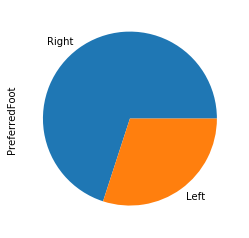

In [277]:
clubParis['PreferredFoot'] = clubParis['Preferred Foot']
clubParis.groupby("PreferredFoot").PreferredFoot.count().sort_values(ascending=False).head(10).plot(kind="pie");

Uit de club Paris Saint-Germain geven de meeste spelers voorkeur aan de rechter voet.

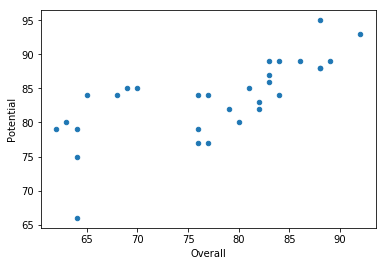

In [278]:
clubParis.plot.scatter(x='Overall',y='Potential');

Vanaf een een overall van 75 lijkt de potential en overall correlatie te hebben met elkaar, echter onder de 75 lijkt dit niet het geval te zijn.

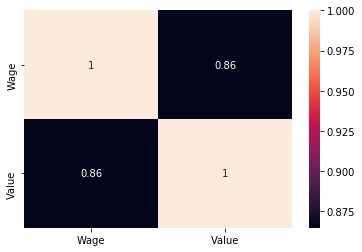

In [279]:
sns.heatmap(clubParis[['Wage', 'Value']].corr(), annot=True)

Hierboven kan je zien dat de Wage en Value de correlatie best hoog is. 
Dit betekent dat er verband zit in de wage en de value van de spelers van Paris Saint-Germain.